一、import some package

In [1]:
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils,plot_model
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping,ModelCheckpoint
from keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mping
import numpy as np
import resnet
import os
import pandas as pd
import random

import pylab
import imageio
imageio.plugins.ffmpeg.download()
import skimage

#from skimage import data, exposure
from skimage.transform import resize
#from skimage.io import imread, imshow, imread_collection, concatenate_images
from sklearn.cross_validation import train_test_split



import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain

import scipy
from keras.models import Model, load_model
from keras.layers import Input,BatchNormalization
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau,CSVLogger
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf




C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


二、读取图片进入X,Y

In [2]:
filename = r'C:\Users\wangpeizhi\Desktop\video2.mov'
vid = imageio.get_reader(filename,  'ffmpeg') 
for im in enumerate(vid):
    if(im[0]%100==0):
        x=im[0]
        print(x)
    length=im[0]+1
print(length)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
17997


In [3]:
print(length)

17997


In [ ]:
img_rows=256
img_cols=256
img_channels=3
nb_classes=10
m=400

filename = r'C:\Users\wangpeizhi\Desktop\video2.mov'
vid = imageio.get_reader(filename,  'ffmpeg') 
X=np.zeros([m,img_rows,img_cols,img_channels])
Y=np.zeros([m,nb_classes])
indice=0
for im in enumerate(vid):
    if(im[0]%45==0)&(indice<m):
        img=im[1]
        image = resize(img, (img_rows,img_cols), mode='constant', preserve_range=True)
        X[indice,:,:,:]=image
        indice +=1
        print(indice)

340


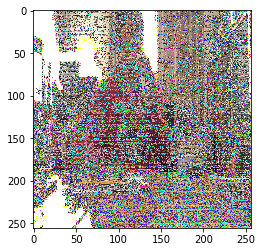

341


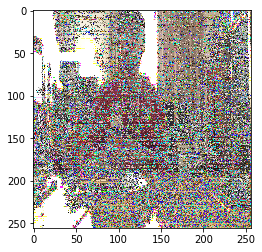

342


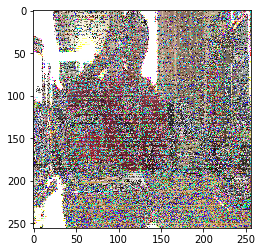

343


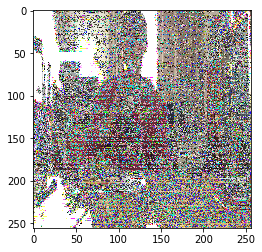

344


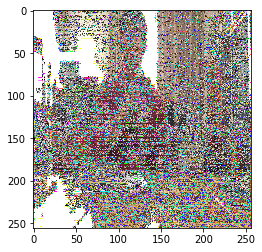

345


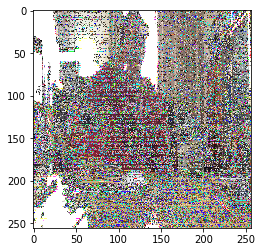

346


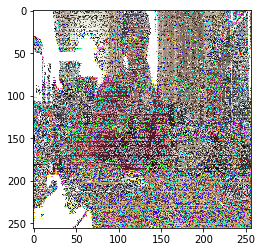

347


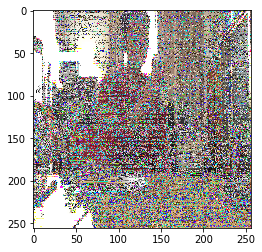

348


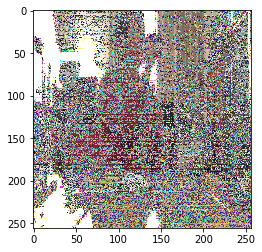

349


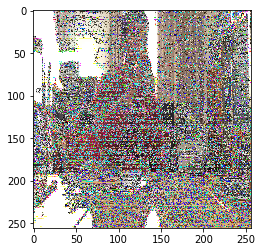

350


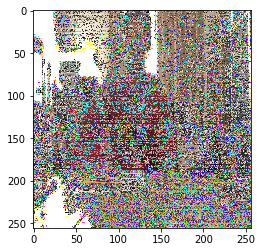

351


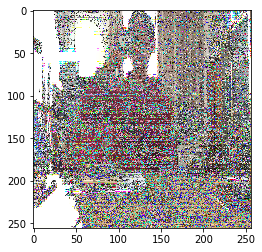

352


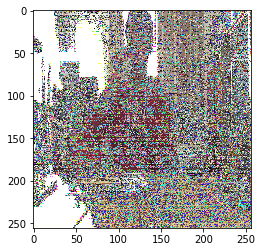

353


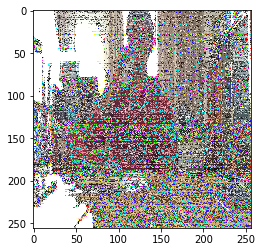

354


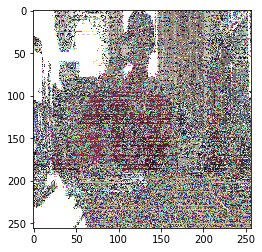

355


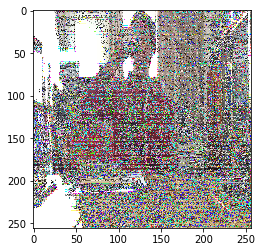

356


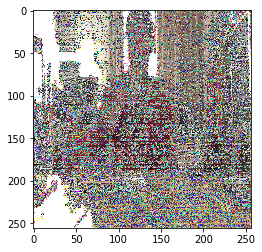

357


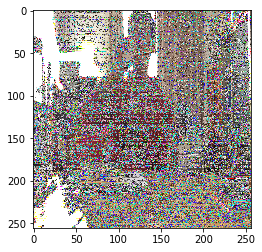

358


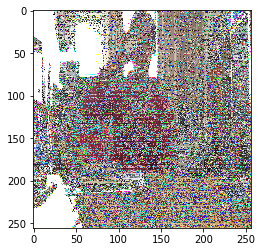

359


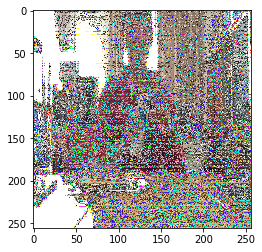

360


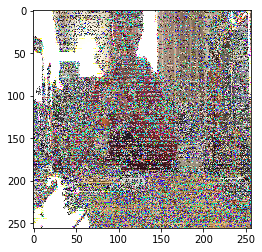

361


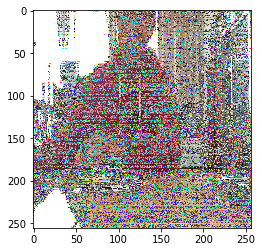

362


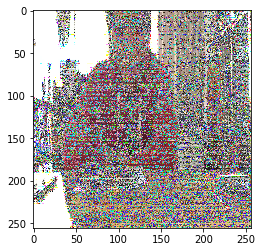

363


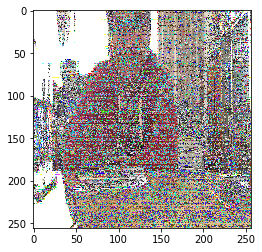

364


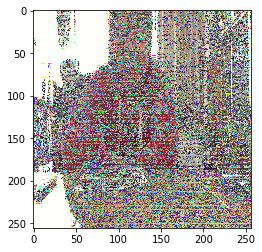

365


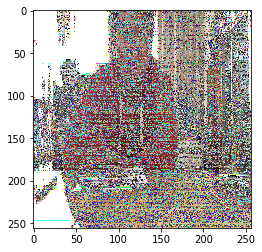

366


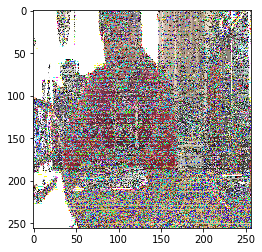

367


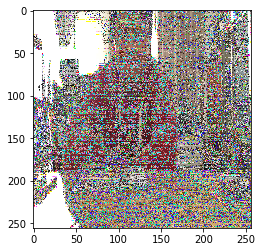

368


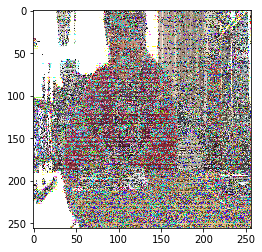

369


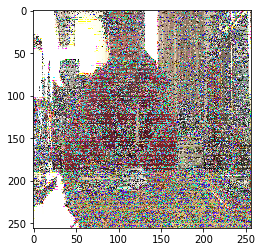

370


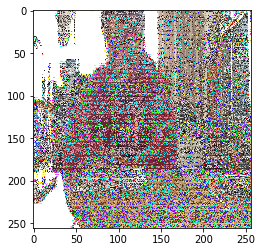

371


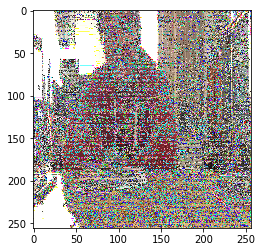

372


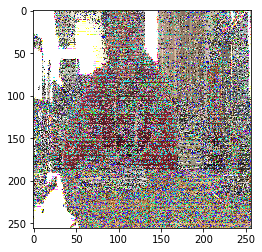

373


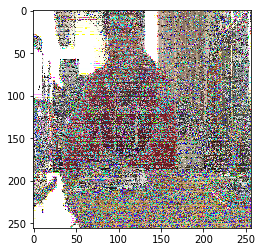

374


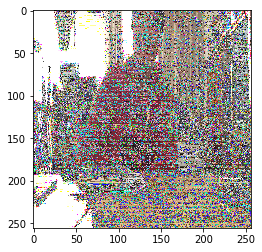

375


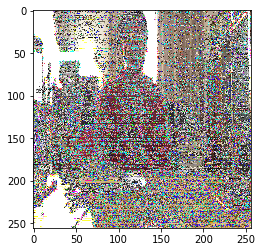

376


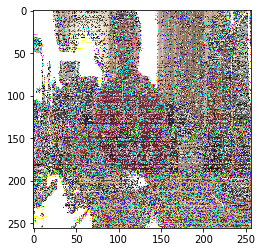

377


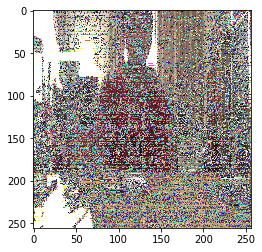

378


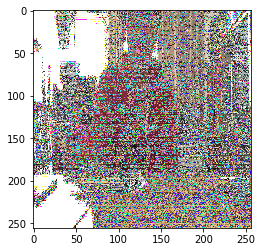

379


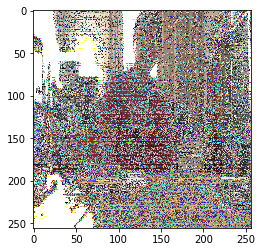

In [5]:
for i in range(340,380):
    print(i)
    plt.imshow(256-X[i,:,:,:])
    plt.show()

In [6]:
for j in range(43):
    Y[j,0]=1
for j in range(43,82):
    Y[j,1]=1
for j in range(82,121):
    Y[j,2]=1
for j in range(121,161):
    Y[j,3]=1
for j in range(161,202):
    Y[j,4]=1
for j in range(202,243):
    Y[j,5]=1
for j in range(243,280):
    Y[j,6]=1
for j in range(280,320):
    Y[j,7]=1
Y[320,0]=1
Y[321,1]=1
for j in range(322,361):
    Y[j,8]=1
for j in range(361,400):
    Y[j,9]=1

三、网络的一些超参数

In [7]:
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=10, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.0005, patience=40)
csv_logger = CSVLogger('imagemodel4.1.csv')
checkpointer = ModelCheckpoint('imagemodel4.1.h5', verbose=1, save_best_only=True)
batch_size = 10
nb_epoch = 300
data_augmentation = False

四、预处理，白化

In [8]:
X=X.astype('float32')
mean_X=np.mean(X,axis=0)
X -= mean_X  #白化，X减去所有数据的均值
X /=128 #这样X大概就是在-1~1之间的分布了

五、搭建网络模型，编译

In [9]:
model = resnet.ResnetBuilder.build_resnet_34((img_channels, img_rows,img_cols), nb_classes)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
#plot_model(model, to_file='model V2.0.png')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 128, 128, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 128, 128, 64) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

__________________________________________________________________________________________________
add_5 (Add)                     (None, 32, 32, 128)  0           add_4[0][0]                      
                                                                 conv2d_12[0][0]                  
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (None, 32, 32, 128)  512         add_5[0][0]                      
__________________________________________________________________________________________________
activation_11 (Activation)      (None, 32, 32, 128)  0           batch_normalization_11[0][0]     
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 32, 32, 128)  147584      activation_11[0][0]              
__________________________________________________________________________________________________
batch_norm

__________________________________________________________________________________________________
activation_21 (Activation)      (None, 16, 16, 256)  0           batch_normalization_21[0][0]     
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 16, 16, 256)  590080      activation_21[0][0]              
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 16, 16, 256)  1024        conv2d_24[0][0]                  
__________________________________________________________________________________________________
activation_22 (Activation)      (None, 16, 16, 256)  0           batch_normalization_22[0][0]     
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 16, 16, 256)  590080      activation_22[0][0]              
__________

batch_normalization_32 (BatchNo (None, 8, 8, 512)    2048        conv2d_35[0][0]                  
__________________________________________________________________________________________________
activation_32 (Activation)      (None, 8, 8, 512)    0           batch_normalization_32[0][0]     
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 8, 8, 512)    2359808     activation_32[0][0]              
__________________________________________________________________________________________________
add_16 (Add)                    (None, 8, 8, 512)    0           add_15[0][0]                     
                                                                 conv2d_36[0][0]                  
__________________________________________________________________________________________________
batch_normalization_33 (BatchNo (None, 8, 8, 512)    2048        add_16[0][0]                     
__________

六、分割X={X_train,X_val}  Y={Y_train,Y_val}

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, random_state=42)
print("X_train.shape=",X_train.shape)
print("Y_train.shape=",Y_train.shape)
print("X_val.shape=",X_val.shape)
print("Y_val.shape=",Y_val.shape)

X_train.shape= (340, 256, 256, 3)
Y_train.shape= (340, 10)
X_val.shape= (60, 256, 256, 3)
Y_val.shape= (60, 10)


七、数据增强，训练

In [11]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              verbose=1,
              validation_data=(X_val, Y_val),
              shuffle=True,
              callbacks=[lr_reducer,checkpointer, early_stopper, csv_logger])
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=True,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=True,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=False,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=False,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(X_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                        steps_per_epoch=X_train.shape[0] // batch_size,
                        validation_data=(X_val, Y_val),
                        epochs=nb_epoch, verbose=1, max_q_size=100,
                        callbacks=[lr_reducer,checkpointer, early_stopper, csv_logger])


Not using data augmentation.
Train on 340 samples, validate on 60 samples
Epoch 1/300
 30/340 [=>............................] - ETA: 7:18 - loss: 3.7579 - acc: 0.0000e+0 - ETA: 4:55 - loss: 3.4765 - acc: 0.2500    - ETA: 4:06 - loss: 3.2026 - acc: 0.3667

KeyboardInterrupt: 

八、测试

In [ ]:
for im in enumerate(vid):
    len_video=im[0]+1
print(len_video)

In [ ]:
model = load_model('imagemodel4.1.h5')
#del X
#del PRED
#del pred
PRED=np.zeros([len_video,1])
sample=np.zeros([1,img_rows,img_cols,img_channels])
indice=0
for im in enumerate(vid):
    sample[0,:,:,:]=im[1]
    sample -=mean_X
    sample /= 128
    pred=model.predict(sample)
    PRED[indice]=np.argmax(pred)
    print(PRED[indice])
    indice +=1

In [ ]:
plt.plot(PRED)
plt.show()


In [ ]:
print(X[0].shape)

In [ ]:
plt.plot(pred)

相比如V1.0版本，这里把resnet18改成了resnet34

In [ ]:
def mapmaxmin(x):
    MIN=np.min(x)
    MAX=np.max(x)
    return (x-MIN)/(MAX-MIN)